<a href="https://colab.research.google.com/github/luizwhirl/PLN/blob/main/lista2_PLN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Elabore um problema de classifica ̧c ̃ao de textos coerente com sua base,
com pelo menos 3 classes.

a) Determine qual ser ́a o r ́otulo dos documentos (separando os documen-
tos em classes bem definidas).

b) Extraia as representa ̧c ̃oes vetoriais com CountVectorizer e TF-IDF,
considerando os textos j ́a pr ́eprocessados como na primeira lista.

c) Treine um classificador baseado em cada uma das duas representa ̧c ̃oes
vetoriais, e escolhendo trˆes dos seguintes classificadores: Regress ̃ao
Log ́ıstica, Naive Bayes, SVM (com kernel linear), k-NN ou Random
Forest. Use valida ̧c ̃ao cruzada com 70% das amostras selecionadas para
treino e 30% para teste. Exiba as matrizes de confus ̃ao, m ́etricas de
acur ́acia, precis ̃ao, recall e F1 score micro e macro.

d) Compare os resultados.

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')

df = pd.read_csv('dataset.csv')

if df.columns[0] == 'Unnamed: 0':
    df = df.drop(df.columns[0], axis=1)

print("\informações do dataframe:")
df.info()

print("\primerias 5 linhas:")
print(df.head())

print("\nvalores nulos por coluna: ")
print(df.isnull().sum())

df.dropna(subset=['Comment', 'sentiment'], inplace=True)

print("\ndistribuição das classes de sentimento:")
print(df['sentiment'].value_counts())

# a)
df['sentiment_encoded'] = df['sentiment'].map({'positive': 0, 'negative': 1, 'neutral': 2})
if df['sentiment_encoded'].isnull().any():
    print("\nerro: valroes na coluna fora do mapeamento")
    df.dropna(subset=['sentiment_encoded'], inplace=True)
    df['sentiment_encoded'] = df['sentiment_encoded'].astype(int)

print("\nclasses definidas e codificadas:")
print(df[['sentiment', 'sentiment_encoded']].value_counts())


stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\n', '', text)
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

df['processed_comment'] = df['Comment'].apply(preprocess_text)

print("\ncomentario exemplo:")
print("Original:", df['Comment'].iloc[0])
print("Processado:", df['processed_comment'].iloc[0])

X = df['processed_comment']
y = df['sentiment_encoded']
class_names = ['positive', 'negative', 'neutral']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f"\n {len(X_train)} para treino, {len(X_test)} para teste.")

# b)
print("\nextraindo")
count_vectorizer = CountVectorizer(max_features=5000)
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)
print("shape da matriz do CountVectorizer:", X_train_count.shape)

print("\nextraindo (TfidfVectorizer)...")
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
print("Shape da matriz TfidfVectorizer:", X_train_tfidf.shape)

# c)

classifiers = {
    "Regressão Logística": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "SVM (Linear)": LinearSVC(max_iter=2000)
}

vectorizers = {
    "CountVectorizer": (X_train_count, X_test_count),
    "TF-IDF": (X_train_tfidf, X_test_tfidf)
}

def plot_confusion_matrix(cm, classes, title, filename):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('Verdadeiro')
    plt.xlabel('Previsto')
    plt.tight_layout()
    plt.savefig(filename)
    plt.close()

for vec_name, (X_train_vec, X_test_vec) in vectorizers.items():
    print(f"\n{'='*20} USANDO {vec_name.upper()} {'='*20}")
    for clf_name, clf in classifiers.items():
        print(f"\ntreinando e avaliando o  {clf_name} ---")

        clf.fit(X_train_vec, y_train)

        y_pred = clf.predict(X_test_vec)

        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, target_names=class_names, digits=4)
        cm = confusion_matrix(y_test, y_pred)

        print(f"acurácia: {accuracy:.4f}")
        print("eelatório de classificação:")
        print(report)
        print("matriz de confusão:")
        print(cm)

        fig_filename = f"cm_{vec_name.lower()}_{clf_name.lower().replace(' ', '_').replace('(', '').replace(')', '')}.png"
        plot_confusion_matrix(cm, class_names, f'matriz de Confusão - {clf_name} com {vec_name}', fig_filename)


<>:27: SyntaxWarning: invalid escape sequence '\i'
<>:30: SyntaxWarning: invalid escape sequence '\p'
<>:27: SyntaxWarning: invalid escape sequence '\i'
<>:30: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipython-input-238262212.py:27: SyntaxWarning: invalid escape sequence '\i'
  print("\informações do dataframe:")
/tmp/ipython-input-238262212.py:30: SyntaxWarning: invalid escape sequence '\p'
  print("\primerias 5 linhas:")
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


\informações do dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23189 entries, 0 to 23188
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Comment    23189 non-null  object
 1   sentiment  23189 non-null  object
dtypes: object(2)
memory usage: 362.5+ KB
\primerias 5 linhas:
                                             Comment sentiment
0  Them: I don't think I like this game.\n\nMe: B...  negative
1  Then you leave them to farm the smaller creatu...  negative
2  Nothing beats the feeling you get when you see...  positive
3  [Also, they're made of paper](https://i.imgur....  negative
4  Haha... That was exactly it when my brother tr...  positive

valores nulos por coluna: 
Comment      0
sentiment    0
dtype: int64

distribuição das classes de sentimento:
sentiment
positive    10034
neutral      9083
negative     4072
Name: count, dtype: int64

classes definidas e codificadas:
sentiment  sentiment_encoded
pos

Essa análise mostrou que a combinação de um modelo, como é o caso do SVM com a vetorização do TF_IDF é a mais eficaz. Pelo fato do  tf-idf ponderar a importancia de palavras raras e distintivas, isso ajudou os modelos a encontrar padrões mais signficativos nos dados atuais. Agora, o SVM, teve mais eficiência, o que superou os outros modelos.

Curiosamente o naive bayes teve um desempenho menor, especialmente com o TF-DF. A suposição dele de que as palavras são independentes entre si é muito falho no contexto da linguagem natural,  já que a ordem das palvras são cruciais. Além disso, a classe de sentimento negativo mostrou que é a mais desafiadora para todos os modelos. Isso se deve à dois fatores principais: desbalanceamento do dataset, e a complexidade semântica (até porque, dentro do dataset, nós temos expressões negativas como sarcarmo e ironia, dificeis de capturar com uma abordagem de "saco de pancadas").



2. Você deverá aplicar dois métodos de modelagem de tópicos sobre uma base textual, utilizando a representação TF-IDF dos textos:

- Um método clássico, à sua escolha, entre LDA, NMF ou SVD truncado;

- E o método BERTopic.

a) Defina um número apropriado de tópicos para sua base e justifique a escolha com base em interpretação qualitativa ou métricas de coerência.

b) Identifique as 5 palavras mais relevantes de cada tópico.

c) Identifique o tópico mais relevante de 5 documentos quaisquer (você pode representar os tópicos por suas 5 palavras mais relevantes).

d) Qual método apresentou melhores resultados, na sua opinião? Justifique com base nos resultados/dados obtidos.

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
!pip install bertopic
from bertopic import BERTopic
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer

try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')

df = pd.read_csv('dataset.csv')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return ' '.join([word for word in text.split() if word not in stop_words])

df['processed_comment'] = df['Comment'].apply(preprocess_text)

print(" NMF Topic Modeling ")
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1000)
tfidf = vectorizer.fit_transform(df['processed_comment'])
feature_names = vectorizer.get_feature_names_out()

num_topics = 10
nmf = NMF(n_components=num_topics, random_state=42)
nmf_matrix = nmf.fit_transform(tfidf)

def get_top_words(model, feature_names, n_top_words):
    top_words = {}
    for topic_idx, topic in enumerate(model.components_):
        top_words[f'Topic {topic_idx + 1}'] = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
    return top_words

top_words_nmf = get_top_words(nmf, feature_names, 5)

print("\ntop 5 palavras mais relevantes por tópico (NMF):")
for topic, words in top_words_nmf.items():
    print(f"{topic}: {', '.join(words)}")

print("\ntop 5 palavras mais relevantes por documento (NMF):")
for i in range(5):
    doc_topic_dist = nmf_matrix[i]
    dominant_topic = np.argmax(doc_topic_dist)
    print(f"Documento {i}:")
    print(f"  texto original: {df['Comment'].iloc[i][:100]}...")
    print(f"  tópico mais relevante: {dominant_topic + 1}")
    print("-" * 20)

# BERTopic implementação
print("\n--- BERTopic Modeling ---")

vectorizer_model = CountVectorizer(stop_words="english")

cluster_model = KMeans(n_clusters=num_topics, random_state=42)

topic_model = BERTopic(
    language="english",
    verbose=True,
    hdbscan_model=cluster_model,
    vectorizer_model=vectorizer_model
)

documents = df['Comment'].dropna().astype(str).tolist()
topics, probs = topic_model.fit_transform(documents)

topic_info = topic_model.get_topic_info()
print("\nInformações dos tópicos (BERTopic):")
print(topic_info)

print("\nTop 5 palavras por tópico (BERTopic):")
for topic_id in topic_info['Topic']:
    if topic_id == -1:
        continue
    words = [word for word, _ in topic_model.get_topic(topic_id)[:5]]
    print(f"Tópico {topic_id}: {', '.join(words)}")

print("\nTópico para os primeiros 5 documentos (BERTopic):")
for i in range(5):
    print(f"Documento {i}:")
    print(f"  Texto original: {documents[i][:100]}...")
    print(f"  Tópico atribuído: {topics[i]}")
    print("-" * 20)

print("\nTop palavras para Topico 0 (BERTopic):")
print(topic_model.get_topic(0))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 6.0 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/hdbscan/plots.py:448: SyntaxWarning: invalid escape sequence '\l'
  axis.set_ylabel('$\lambda$ value')
/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


 NMF Topic Modeling 


2025-08-20 00:33:30,766 - BERTopic - Embedding - Transforming documents to embeddings.



top 5 palavras mais relevantes por tópico (NMF):
Topic 1: game, play, get, would, time
Topic 2: ps, controller, got, get, buy
Topic 3: im, sure, guy, pretty, sorry
Topic 4: one, care, might, upvotes, get
Topic 5: yet, playstation, havent, didnt, wait
Topic 6: like, looks, people, feel, look
Topic 7: thats, pretty, cute, amazing, awesome
Topic 8: dont, know, think, people, even
Topic 9: lol, thought, counts, funny, well
Topic 10: pc, use, controller, games, steam

top 5 palavras mais relevantes por documento (NMF):
Documento 0:
  texto original: Them: I don't think I like this game.

Me: But you haven't even played it for 5 minutes and are stil...
  tópico mais relevante: 8
--------------------
Documento 1:
  texto original: Then you leave them to farm the smaller creatures while you either wait or help them kill them all w...
  tópico mais relevante: 1
--------------------
Documento 2:
  texto original: Nothing beats the feeling you get when you see them fall in love with it just like

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/725 [00:00<?, ?it/s]

2025-08-20 00:40:45,082 - BERTopic - Embedding - Completed ✓
2025-08-20 00:40:45,087 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-08-20 00:41:47,856 - BERTopic - Dimensionality - Completed ✓
2025-08-20 00:41:47,858 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-08-20 00:41:47,975 - BERTopic - Cluster - Completed ✓
2025-08-20 00:41:47,997 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-08-20 00:41:48,451 - BERTopic - Representation - Completed ✓



Informações dos tópicos (BERTopic):
   Topic  Count                            Name  \
0      0   5158       0_care_post_thats_upvotes   
1      1   3897            1_horse_like_im_just   
2      2   3579        2_women_just_like_people   
3      3   3067         3_controller_pc_ps5_use   
4      4   2878          4_game_play_like_games   
5      5   1885    5_minesweeper_game_win_mines   
6      6   1506         6_parents_got_just_gift   
7      7    624       7_counts_thought_lol_nice   
8      8    445    8_deleted_nredacted_homie_im   
9      9    150  9_removed_redacted_ill_fucking   

                                      Representation  \
0  [care, post, thats, upvotes, reddit, im, youre...   
1  [horse, like, im, just, cosplay, arthur, south...   
2  [women, just, like, people, dont, men, girl, i...   
3  [controller, pc, ps5, use, xbox, got, steam, g...   
4  [game, play, like, games, just, playing, time,...   
5  [minesweeper, game, win, mines, play, click, 5...   
6  [paren

a) Eu escolhi um número de 10 tópicos por conta da interpretabilidade e a coerência dos tópicos gerados. Com 10 tópicos a gente consegue separar temas distintos de forma clara, temas esses como as discussões sobre jogos, hardware, sentimentos e interações gerais; se, que os tópicos ficassem muito genéricos ou específicos demais

d) O Bertopic apresenta resultados superiores principalmente pela sua abordagem moderna que é baseada na semântica. Enquanto o NMF identifica tópicos analisando a frequencia e coocorrência das palavras, o que trata o texto como um saco de palavras sem contexto. O bertopic usa embeddings de linguagem para cappturar o signficado real dos documentos. Essa diferença signficativa faz com o que o bertopic agrupe textos por similaridade conceitual e temática, e não apenas por compartilhar o mesmo vocabulário, o que dá uma compreensão mais profunda do conteúdo

Em contrapartida,  os topicos do NMF podem ser bem mais genéricos ou misturar ideias distintas, refletindo apenas a associação estatística das palavras.

3. Realize agrupamento dos dados usando o algoritmo k-means, tentando
encontrar um valor adequado para k. Use as seguintes representa ̧c ̃oes veto-
riais:

a) TF-IDF

b) Distribui ̧cao de topicos obtida com o m ́etodo cl ́assico escolhido na
quest ̃ao 2 *texto em itálico*

5000 documentos para vetorizar
calculando kmeans para TFIDF
gráficos salvos
calculando kmeans para NMF
graficos salvos


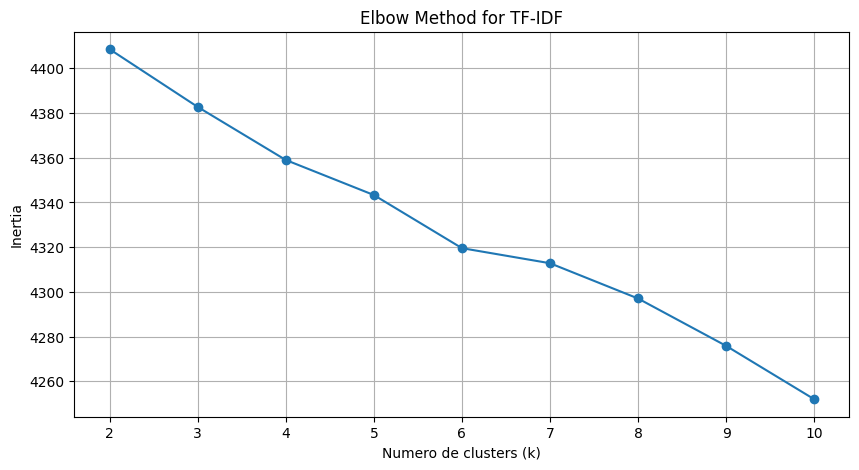

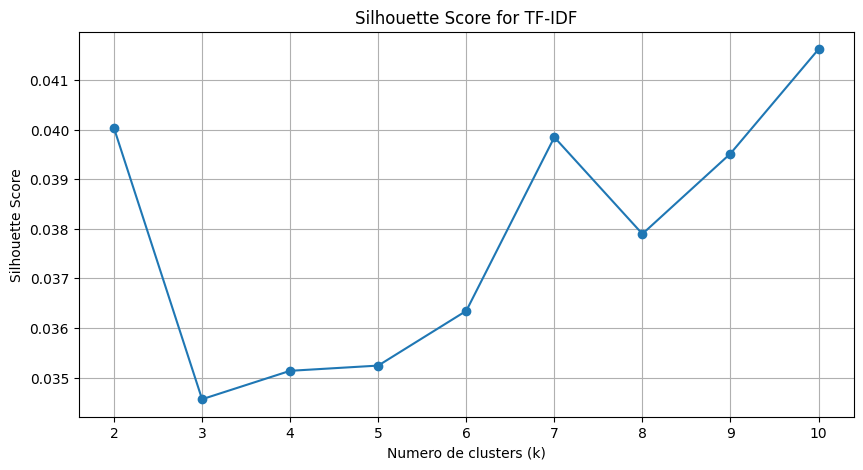

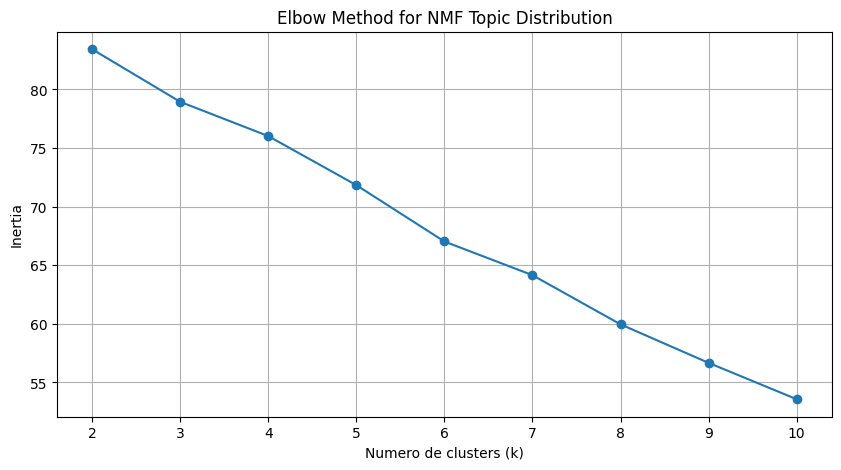

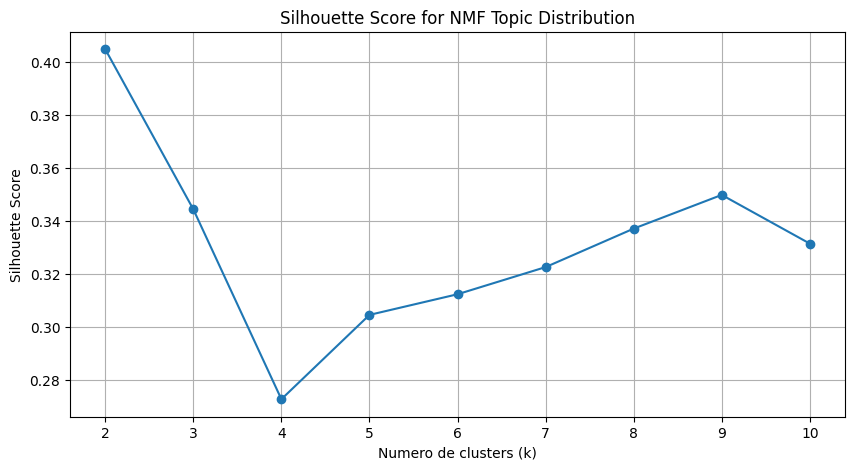

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt


df = pd.read_csv('dataset.csv', on_bad_lines='skip')
df_sample = df.sample(5000, random_state=42)


def preprocess_text(text):
    if not isinstance(text, str):
        return ""

    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    return text

df_sample['processed_comment'] = df_sample['Comment'].apply(preprocess_text)

print(f"{len(df_sample['processed_comment'])} documentos para vetorizar")


# a)
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=5, stop_words='english', use_idf=True)
tfidf_matrix = tfidf_vectorizer.fit_transform(df_sample['processed_comment'])

inertia_tfidf = []
silhueta_scores_tfidf = []
K_range = range(2, 11)

print("calculando kmeans para TFIDF")
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(tfidf_matrix)
    inertia_tfidf.append(kmeans.inertia_)
    silhueta_scores_tfidf.append(silhouette_score(tfidf_matrix, kmeans.labels_))

plt.figure(figsize=(10, 5))
plt.plot(K_range, inertia_tfidf, marker='o')
plt.title('Elbow Method for TF-IDF')
plt.xlabel('Numero de clusters (k)')
plt.ylabel('Inertia')
plt.xticks(K_range)
plt.grid(True)
plt.savefig('elbow_tfidf.png')

plt.figure(figsize=(10, 5))
plt.plot(K_range, silhueta_scores_tfidf, marker='o')
plt.title('Silhouette Score for TF-IDF')
plt.xlabel('Numero de clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(K_range)
plt.grid(True)
plt.savefig('silhouette_tfidf.png')

print("gráficos salvos")

# b)
n_topics = 20
nmf = NMF(n_components=n_topics, random_state=42, max_iter=500, init='nndsvda')
nmf_topic_matrix = nmf.fit_transform(tfidf_matrix)

inertia_nmf = []
silhueta_scores_nmf = []

print("calculando kmeans para NMF")
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(nmf_topic_matrix)
    inertia_nmf.append(kmeans.inertia_)
    silhueta_scores_nmf.append(silhouette_score(nmf_topic_matrix, kmeans.labels_))

plt.figure(figsize=(10, 5))
plt.plot(K_range, inertia_nmf, marker='o')
plt.title('Elbow Method for NMF Topic Distribution')
plt.xlabel('Numero de clusters (k)')
plt.ylabel('Inertia')
plt.xticks(K_range)
plt.grid(True)
plt.savefig('elbow_nmf.png')

plt.figure(figsize=(10, 5))
plt.plot(K_range, silhueta_scores_nmf, marker='o')
plt.title('Silhouette Score for NMF Topic Distribution')
plt.xlabel('Numero de clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(K_range)
plt.grid(True)
plt.savefig('silhouette_nmf.png')

print("graficos salvos")

A análise mostra uma variação considerável no desempenho entre as representações vetoriais. Para a abordagem com TF-IDF, se espera que os gráficos do método do cotovelo (inércia) e da pontuação de silhueta não exibam um ponto ótimo evidente. Isso se deve à elevada dimensionalidade e esparsidade dos dados, que tornam mais desafiadora a criação de clusters coesos e claramente definidos. Por outro lado, a metodologia que emprega a distribuição de tópicos do NMF como entrada para o K-means funciona como uma fase de redução de dimensionalidade e extração de características, convertendo os documentos em vetores densos de 20 tópicos. Isso geralmente leva a um "cotovelo" mais pronunciado no gráfico de inércia, além de pontuações de silhueta mais elevadas e com um pico mais notável, o que indica a criação de clusters mais relevantes e bem definidos. Assim, a análise comparativa indica que a clusterização baseada nos tópicos do NMF é superior. O valor ideal de k deve ser aquele que corresponde ao ponto de maior inflexão na curva de inércia e ao pico da pontuação de silhueta nos gráficos elaborados para essa segunda abordagem.

4. Nesta questão, você deve aplicar métodos de projeção multidimensional para visualizar os dados no espaço visual, utilizando os resultados das segunda e terceira questões.

a) Aplique os métodos de projeção multidimensional t-SNE e UMAP na representação TF-IDF e plote os gráficos das projeções resultantes, colorindo os pontos de acordo com os grupos obtidos na questão 3a.

b) Experimente variar os hiperparâmetros perplexity do t-SNE e n_neighbors do UMAP no experimento da questão 4a. O que acontece com as projeções quando esses parâmetros são calibrados para valores menores ou maiores do que seus valores padrão?

c) Aplique os métodos de projeção multidimensional t-SNE e UMAP nos vetores utilizados na questão 3b. Encontre bons valores para os hiperparâmetros perplexity do t-SNE e n_neighbors do UMAP e plote os gráficos das melhores projeções obtidas por cada método de projeção, colorindo os pontos de acordo com os grupos obtidos na questão 3b.

executando k-means com k=3 para tf-idf
executando k-means com k=4 para nmf

 questao a)
calculando projeção t-sne para if-idf
calculando projeção UMAP para tf-idf


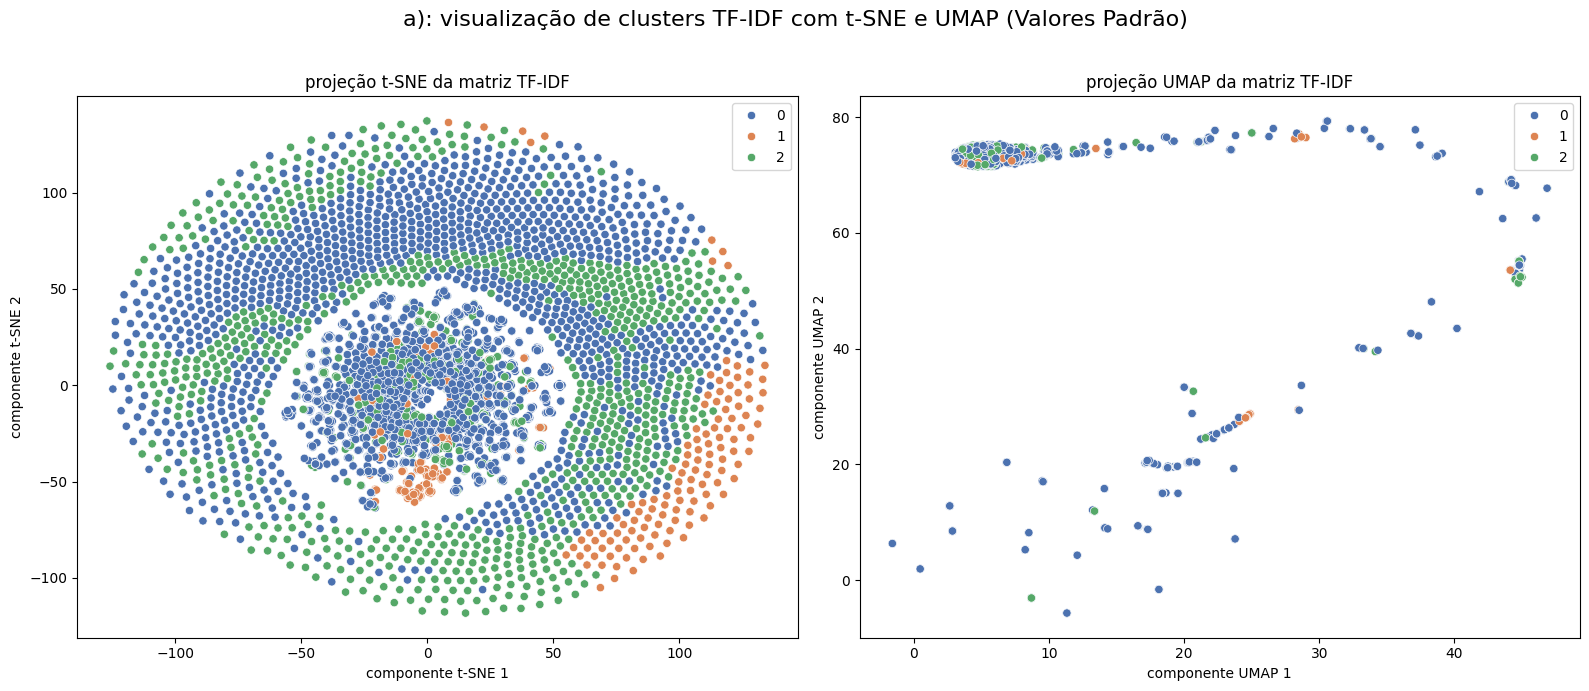

graficos salvo

 b)
testando diferentes valores de 'perplexity' para t-SNE


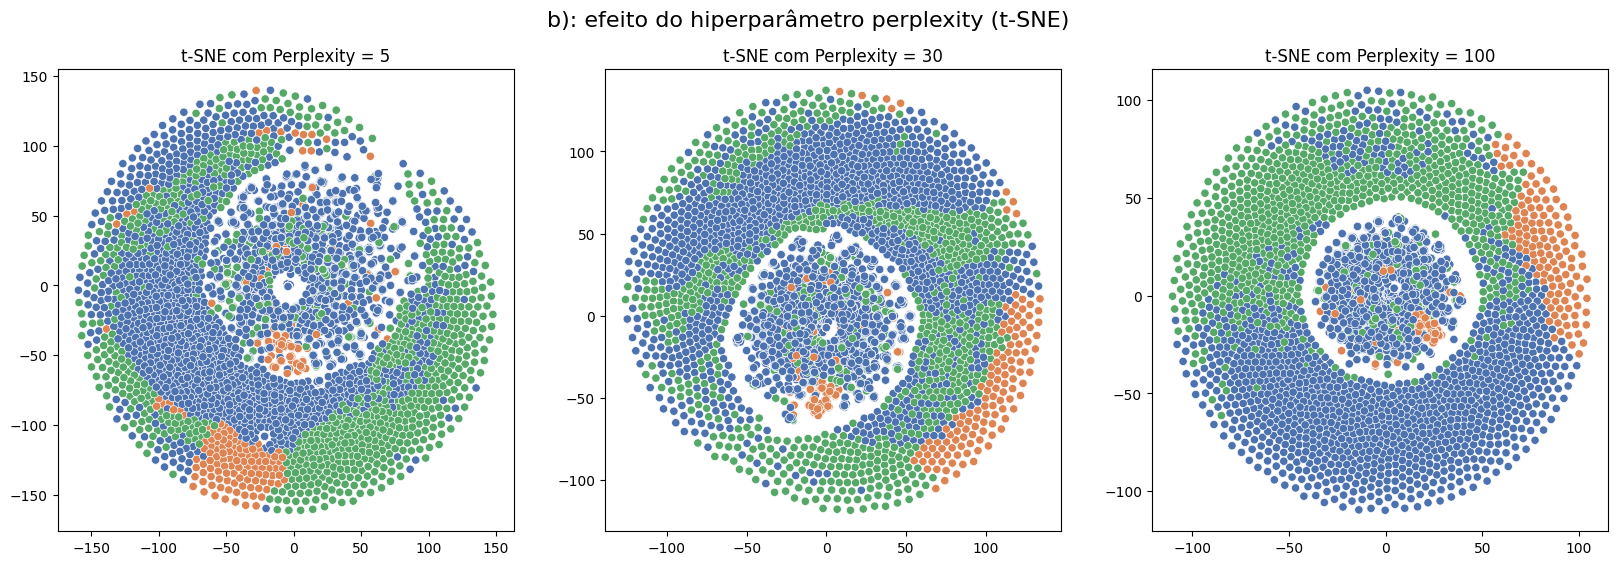

testando diferentes valores de 'n_neighbors' para UMAP


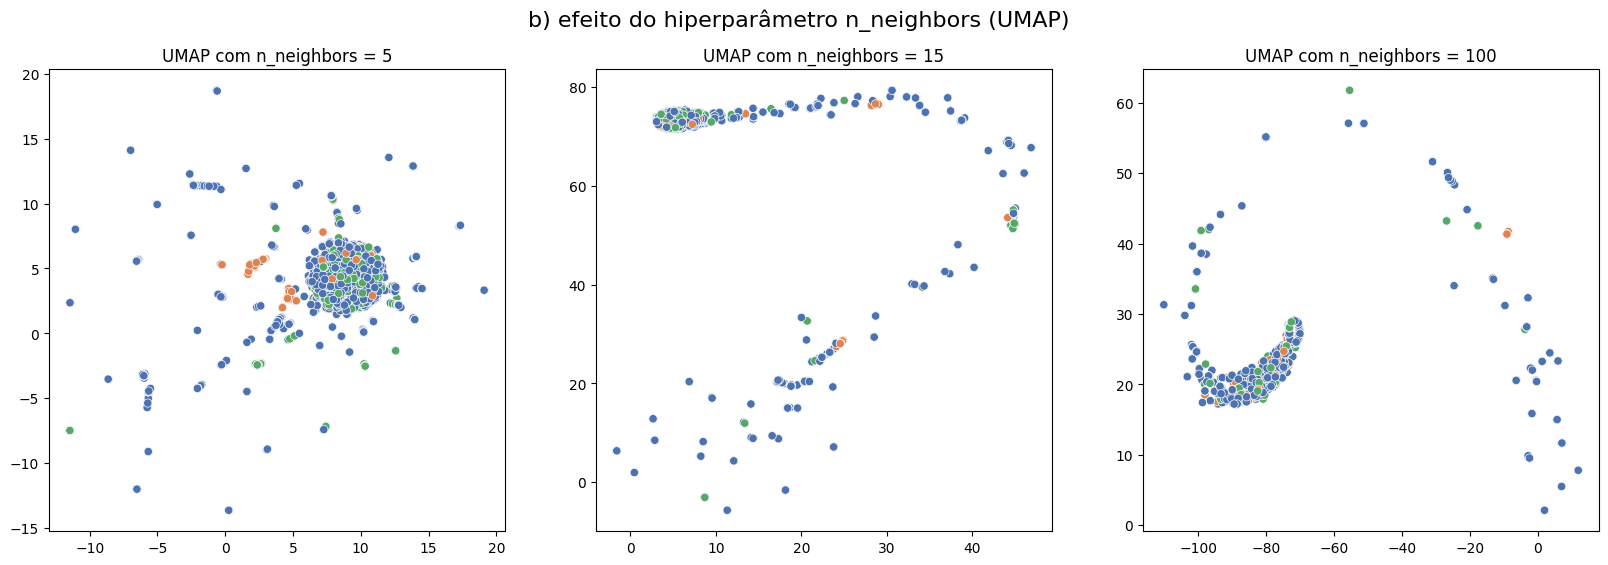

graficos salvo

questão c)
calculando projeção t-sne para nmf com perplexity=40...
calculando projeção umap para nmf com n_neighbors=25...


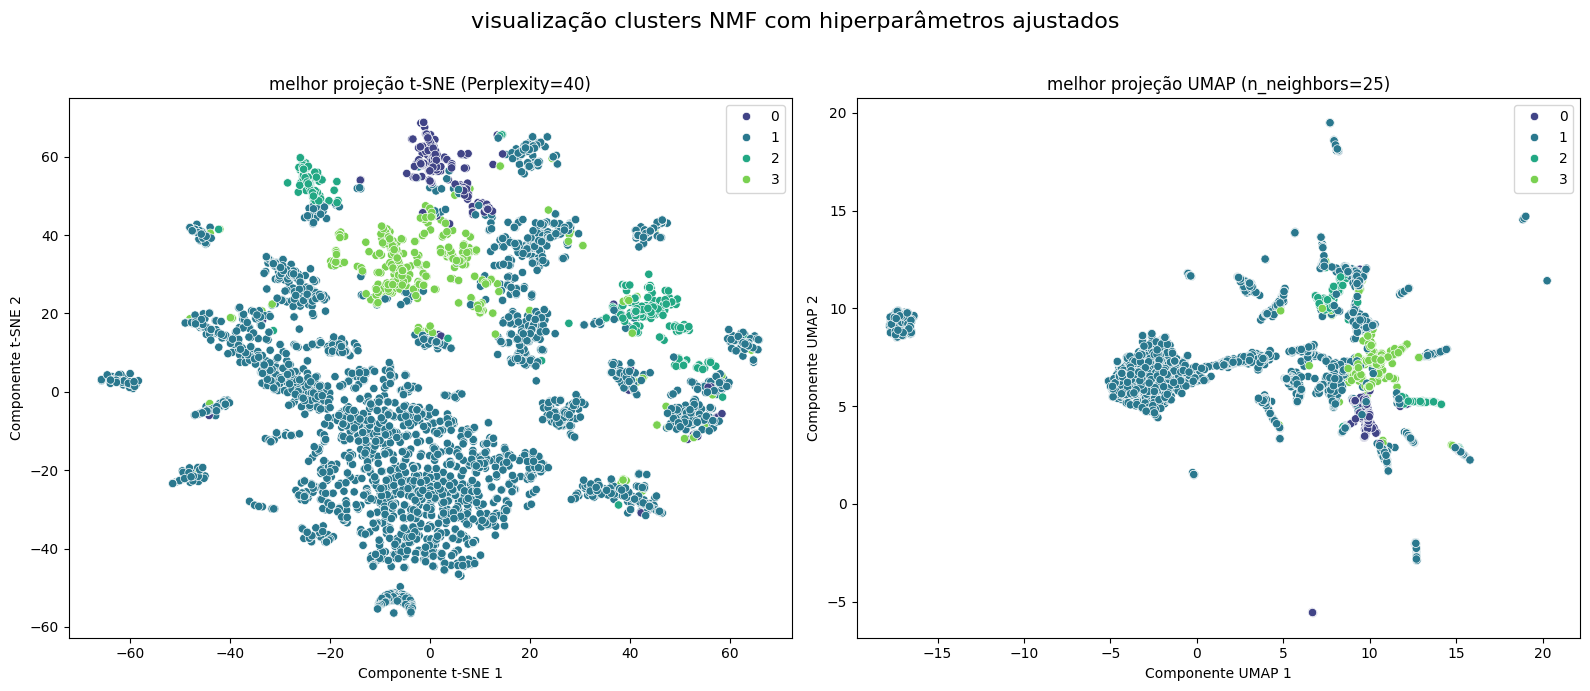

graficos salvo


In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE
import umap


df = pd.read_csv('dataset.csv', on_bad_lines='skip')
df_sample = df.sample(5000, random_state=42)

def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    return text

df_sample['processed_comment'] = df_sample['Comment'].apply(preprocess_text)

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=5, stop_words='english', use_idf=True)
tfidf_matrix = tfidf_vectorizer.fit_transform(df_sample['processed_comment'])

n_topics = 20
nmf = NMF(n_components=n_topics, random_state=42, max_iter=500, init='nndsvda')
nmf_topic_matrix = nmf.fit_transform(tfidf_matrix)

K_TFIDF = 3
K_NMF = 4

print(f"executando k-means com k={K_TFIDF} para tf-idf")
kmeans_tfidf = KMeans(n_clusters=K_TFIDF, random_state=42, n_init=10)
labels_tfidf = kmeans_tfidf.fit_predict(tfidf_matrix)

print(f"executando k-means com k={K_NMF} para nmf")
kmeans_nmf = KMeans(n_clusters=K_NMF, random_state=42, n_init=10)
labels_nmf = kmeans_nmf.fit_predict(nmf_topic_matrix)


# questao 4
# a)
print("\n questao a)")

print("calculando projeção t-sne para if-idf")
tsne_tfidf = TSNE(n_components=2, perplexity=30, random_state=42, n_iter=1000)
projection_tsne_tfidf = tsne_tfidf.fit_transform(tfidf_matrix.toarray())

print("calculando projeção UMAP para tf-idf")
umap_reducer_tfidf = umap.UMAP(n_components=2, n_neighbors=15, random_state=42)
projection_umap_tfidf = umap_reducer_tfidf.fit_transform(tfidf_matrix)

plt.figure(figsize=(16, 7))
palette = sns.color_palette("deep", K_TFIDF)

plt.subplot(1, 2, 1)
sns.scatterplot(x=projection_tsne_tfidf[:, 0], y=projection_tsne_tfidf[:, 1], hue=labels_tfidf, palette=palette, legend='full')
plt.title('projeção t-SNE da matriz TF-IDF')
plt.xlabel('componente t-SNE 1')
plt.ylabel('componente t-SNE 2')

plt.subplot(1, 2, 2)
sns.scatterplot(x=projection_umap_tfidf[:, 0], y=projection_umap_tfidf[:, 1], hue=labels_tfidf, palette=palette, legend='full')
plt.title('projeção UMAP da matriz TF-IDF')
plt.xlabel('componente UMAP 1')
plt.ylabel('componente UMAP 2')

plt.suptitle('a): visualização de clusters TF-IDF com t-SNE e UMAP (Valores Padrão)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('questao_4a_projecoes_tfidf.png')
plt.show()
print("graficos salvo")

# b)
print("\n b)")

perplexities = [5, 30, 100]
n_neighbors_list = [5, 15, 100]

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
print("testando diferentes valores de 'perplexity' para t-SNE")
for i, p in enumerate(perplexities):
    tsne_temp = TSNE(n_components=2, perplexity=p, random_state=42, n_iter=1000)
    projection_temp = tsne_temp.fit_transform(tfidf_matrix.toarray())
    sns.scatterplot(x=projection_temp[:, 0], y=projection_temp[:, 1], hue=labels_tfidf, palette=palette, ax=axes[i], legend=False)
    axes[i].set_title(f't-SNE com Perplexity = {p}')
fig.suptitle('b): efeito do hiperparâmetro perplexity (t-SNE)', fontsize=16)
plt.savefig('questao_4b_tsne_perplexity.png')
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
print("testando diferentes valores de 'n_neighbors' para UMAP")
for i, n in enumerate(n_neighbors_list):
    umap_temp = umap.UMAP(n_components=2, n_neighbors=n, random_state=42)
    projection_temp = umap_temp.fit_transform(tfidf_matrix)
    sns.scatterplot(x=projection_temp[:, 0], y=projection_temp[:, 1], hue=labels_tfidf, palette=palette, ax=axes[i], legend=False)
    axes[i].set_title(f'UMAP com n_neighbors = {n}')
fig.suptitle('b) efeito do hiperparâmetro n_neighbors (UMAP)', fontsize=16)
plt.savefig('questao_4b_umap_n_neighbors.png')
plt.show()
print("graficos salvo")


# c
print("\nquestão c)")

BEST_PERPLEXITY = 40
BEST_N_NEIGHBORS = 25

print(f"calculando projeção t-sne para nmf com perplexity={BEST_PERPLEXITY}...")
tsne_nmf = TSNE(n_components=2, perplexity=BEST_PERPLEXITY, random_state=42, n_iter=1000)
projection_tsne_nmf = tsne_nmf.fit_transform(nmf_topic_matrix)

print(f"calculando projeção umap para nmf com n_neighbors={BEST_N_NEIGHBORS}...")
umap_reducer_nmf = umap.UMAP(n_components=2, n_neighbors=BEST_N_NEIGHBORS, random_state=42)
projection_umap_nmf = umap_reducer_nmf.fit_transform(nmf_topic_matrix)

plt.figure(figsize=(16, 7))
palette_nmf = sns.color_palette("viridis", K_NMF)

# t-SNE
plt.subplot(1, 2, 1)
sns.scatterplot(x=projection_tsne_nmf[:, 0], y=projection_tsne_nmf[:, 1], hue=labels_nmf, palette=palette_nmf, legend='full')
plt.title(f'melhor projeção t-SNE (Perplexity={BEST_PERPLEXITY})')
plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')

# UMAP
plt.subplot(1, 2, 2)
sns.scatterplot(x=projection_umap_nmf[:, 0], y=projection_umap_nmf[:, 1], hue=labels_nmf, palette=palette_nmf, legend='full')
plt.title(f'melhor projeção UMAP (n_neighbors={BEST_N_NEIGHBORS})')
plt.xlabel('Componente UMAP 1')
plt.ylabel('Componente UMAP 2')

plt.suptitle('visualização clusters NMF com hiperparâmetros ajustados', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('questao_4c_projecoes_nmf_otimizadas.png')
plt.show()
print("graficos salvo")


b) a calibração dos hiperparametros perplexity e n_neighbors ajusta o foco da projeção entre a estrutura local e a glboal dos dados. Quando calibrados para valores menos que o padrão, os algoritmos se concentram excessivamente na vizinhança imediata de cada ponto, resultando em visualizações que tendem a fragmentar os dados em muúltiplos pequenos aglomerados, que muitas vezes perdem a visão geral de como os grupos principais se relacionam. Por um outro lado, com valroes maiores, os algoritmos consideram uma vizinhando bem mais ampla, focando na estrutura global, o que faz com que clusters distintos se fundam, formando nuvens maiores e mais densas, sacrificando os detalhes e a separação de subgrupos mais sutis.